In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpdaf.obj import Cube, WCS, WaveCoord
from mpdaf.obj import iter_spe, Spectrum
from tqdm import tqdm

In [2]:
full_cube = Cube('/home/spectram/projects/cartwheel/muse/ADP.2017-03-23T15:47:52.027.fits')

full_cube.info()
# full_cont = full_cube.loop_spe_multiprocessing(f=Spectrum.poly_spec, deg=5)
# full_line=full_cube-full_cont

[INFO] 3682 x 457 x 426 Cube (/home/spectram/projects/cartwheel/muse/ADP.2017-03-23T15:47:52.027.fits)


[INFO] .data(3682 x 457 x 426) (1e-20 erg / (Angstrom s cm2)), .var(3682 x 457 x 426)
[INFO] center:(-33:42:52.81707816,00:37:40.46005657) size:(91.400",85.200") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4750.13 max:9351.38 step:1.25 Angstrom


In [ ]:
img = full_cont.sum(axis=0)
plt.figure()
img.plot(scale='arcsinh', colorbar='v', title='Parallel cont deg 5')

In [ ]:
plt.figure()
full_line.sum(axis=0).plot(scale='arcsinh',colobar='v')
full_line.sum(axis=(1,2)).plot()

0it [00:00, ?it/s]

100it [00:03, 29.27it/s]


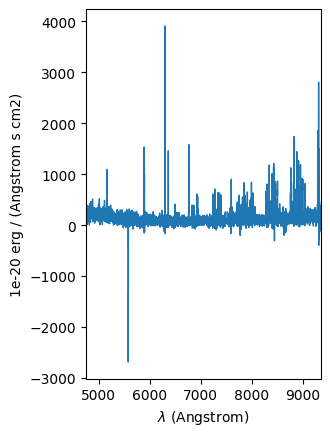

: 

In [6]:
def continuum_extraction(cube,cont_cube):
    for sp, co in tqdm(zip(iter_spe(cube), iter_spe(cont_cube))):        
        co[:] = sp.poly_spec(5)
    return cube, cont_cube

small_cube = full_cube[:,60:70,60:70] #specify dimensions as needed

sub_cube, cont_cube= continuum_extraction(small_cube, \
    small_cube.clone(data_init=np.empty, var_init=np.zeros))

#subtracting continuum
line = sub_cube - cont_cube

plt.figure()
line.sum(axis=0).plot(scale='arcsinh')
line.sum(axis=(1,2)).plot()
